In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=16b3d812503876657c7f5aae7a89422e


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sulangan
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | zhezkazgan
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | sept-iles
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | brae
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | tilichiki
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | esna
Processing Record 22 of Set 1 | russell
Processing Record 

Processing Record 39 of Set 4 | okato
Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | one hundred mile house
City not found. Skipping...
Processing Record 42 of Set 4 | le port
Processing Record 43 of Set 4 | akwatia
Processing Record 44 of Set 4 | hoa binh
Processing Record 45 of Set 4 | ontario
Processing Record 46 of Set 4 | oro valley
Processing Record 47 of Set 4 | milkovo
Processing Record 48 of Set 4 | tutoia
Processing Record 49 of Set 4 | istanbul
Processing Record 50 of Set 4 | manaure
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | scarborough
Processing Record 3 of Set 5 | shihezi
Processing Record 4 of Set 5 | shakawe
Processing Record 5 of Set 5 | bilma
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 9 of Set 5 | lamar
Processing Record 10 of Set 5 | norman wells
Processing Record 11 of

Processing Record 32 of Set 8 | san carlos de bariloche
Processing Record 33 of Set 8 | marawi
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | balsta
Processing Record 36 of Set 8 | sao filipe
Processing Record 37 of Set 8 | alofi
Processing Record 38 of Set 8 | ugoofaaru
Processing Record 39 of Set 8 | ledyard
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | oussouye
Processing Record 42 of Set 8 | tarudant
City not found. Skipping...
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | tateyama
Processing Record 45 of Set 8 | tiksi
Processing Record 46 of Set 8 | havre-saint-pierre
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | arlit
Processing Record 49 of Set 8 | kiama
Processing Record 50 of Set 8 | buchanan
Processing Record 1 of Set 9 | ituiutaba
Processing Record 2 of Set 9 | digha
Processing Record 3 of Set 9 | halalo
City not found. Skipping...
Processin

Processing Record 21 of Set 12 | troitskoye
Processing Record 22 of Set 12 | queenstown
Processing Record 23 of Set 12 | altagracia de orituco
Processing Record 24 of Set 12 | kabalo
Processing Record 25 of Set 12 | samagaltay
Processing Record 26 of Set 12 | laurel
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | nizwa
Processing Record 29 of Set 12 | yagodnoye
Processing Record 30 of Set 12 | taoudenni
Processing Record 31 of Set 12 | cairns
Processing Record 32 of Set 12 | nueva italia de ruiz
Processing Record 33 of Set 12 | nyurba
Processing Record 34 of Set 12 | tawang
Processing Record 35 of Set 12 | krasnaya gorbatka
Processing Record 36 of Set 12 | san rafael
Processing Record 37 of Set 12 | ranong
Processing Record 38 of Set 12 | porto santo
Processing Record 39 of Set 12 | zaysan
Processing Record 40 of Set 12 | sokolo
Processing Record 41 of Set 12 | amga
Processing Record 42 of Set 12 | fairbanks
Processing Record 43 of Set 12 | sentyabrskiy
City no

In [8]:
# Print the city count to confirm sufficient count.
len(city_data)

583

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sulangan,11.14,123.72,79.36,78,10,14.23,PH,2020-02-22 05:26:57
1,Albany,42.60,-73.97,27.00,42,1,6.93,US,2020-02-22 05:22:31
2,Zhezkazgan,47.80,67.71,26.60,92,90,8.95,KZ,2020-02-22 05:24:28
3,Butaritari,3.07,172.79,79.93,81,100,10.29,KI,2020-02-22 05:26:27
4,Rikitea,-23.12,-134.97,78.22,74,16,8.32,PF,2020-02-22 05:26:22
5,Kapaa,22.08,-159.32,75.20,78,40,12.75,US,2020-02-22 05:26:40
6,Ancud,-41.87,-73.82,51.80,71,0,4.70,CL,2020-02-22 05:26:34
7,Sept-Iles,50.20,-66.38,23.00,73,90,13.87,CA,2020-02-22 05:26:58
8,Castro,-24.79,-50.01,62.82,99,95,4.52,BR,2020-02-22 05:26:22
9,East London,-33.02,27.91,69.80,100,90,10.29,ZA,2020-02-22 05:22:43


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sulangan,PH,2020-02-22 05:26:57,11.14,123.72,79.36,78,10,14.23
1,Albany,US,2020-02-22 05:22:31,42.60,-73.97,27.00,42,1,6.93
2,Zhezkazgan,KZ,2020-02-22 05:24:28,47.80,67.71,26.60,92,90,8.95
3,Butaritari,KI,2020-02-22 05:26:27,3.07,172.79,79.93,81,100,10.29
4,Rikitea,PF,2020-02-22 05:26:22,-23.12,-134.97,78.22,74,16,8.32
5,Kapaa,US,2020-02-22 05:26:40,22.08,-159.32,75.20,78,40,12.75
6,Ancud,CL,2020-02-22 05:26:34,-41.87,-73.82,51.80,71,0,4.70
7,Sept-Iles,CA,2020-02-22 05:26:58,50.20,-66.38,23.00,73,90,13.87
8,Castro,BR,2020-02-22 05:26:22,-24.79,-50.01,62.82,99,95,4.52
9,East London,ZA,2020-02-22 05:22:43,-33.02,27.91,69.80,100,90,10.29


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582349362.413569

In [14]:
today = time.strftime("%x")
today

'02/21/20'

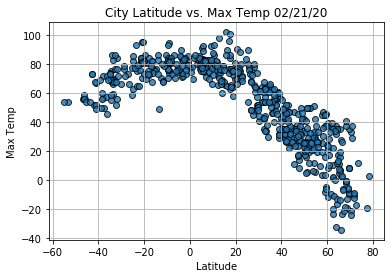

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

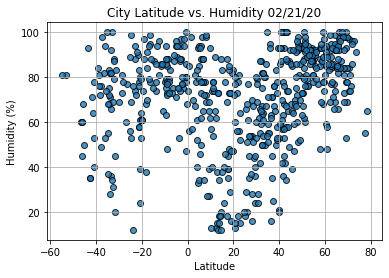

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

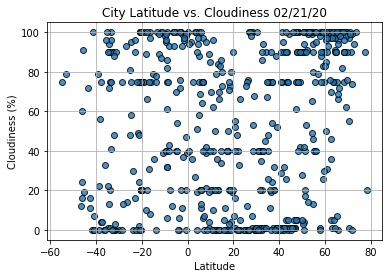

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

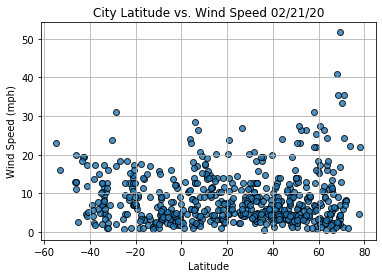

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [43]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Annotate the text for the p and r values.
    plt.text(0,1, f"The p-value is: {p_value:.3f}", fontsize=10, transform=plt.gcf().transFigure, color="purple")
    plt.text(0,0, f"The r-value is: {r_value:.3f}", fontsize=10, transform=plt.gcf().transFigure, color="orange")
    
    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]

index13

City                Leningradskiy
Country                        RU
Date          2020-02-22 05:27:00
Lat                         69.38
Lng                        178.42
Max Temp                    -9.13
Humidity                       93
Cloudiness                    100
Wind Speed                  16.82
Name: 13, dtype: object

In [45]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
578     True
579     True
580     True
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sulangan,PH,2020-02-22 05:26:57,11.14,123.72,79.36,78,10,14.23
1,Albany,US,2020-02-22 05:22:31,42.60,-73.97,27.00,42,1,6.93
2,Zhezkazgan,KZ,2020-02-22 05:24:28,47.80,67.71,26.60,92,90,8.95
3,Butaritari,KI,2020-02-22 05:26:27,3.07,172.79,79.93,81,100,10.29
5,Kapaa,US,2020-02-22 05:26:40,22.08,-159.32,75.20,78,40,12.75
...,...,...,...,...,...,...,...,...,...
578,San Rafael Del Sur,NI,2020-02-22 05:29:22,11.85,-86.44,78.80,65,20,13.87
579,Shipitsyno,RU,2020-02-22 05:29:22,61.28,46.52,33.22,86,93,10.63
580,Lixourion,GR,2020-02-22 05:29:22,38.20,20.43,46.00,65,0,5.99
581,Monywa,MM,2020-02-22 05:29:22,22.12,95.13,88.68,18,0,6.02


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

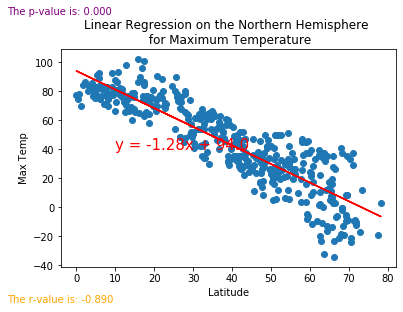

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for Maximum Temperature")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,40))

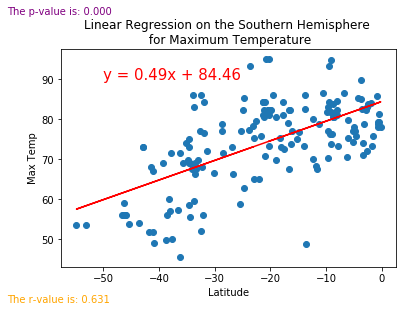

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for Maximum Temperature")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,90))

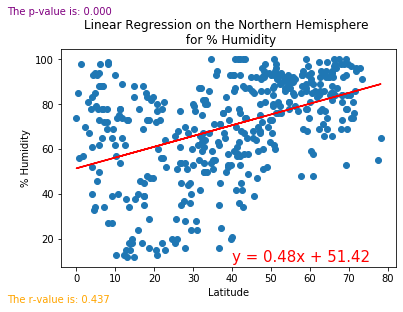

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for % Humidity")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(40,10))

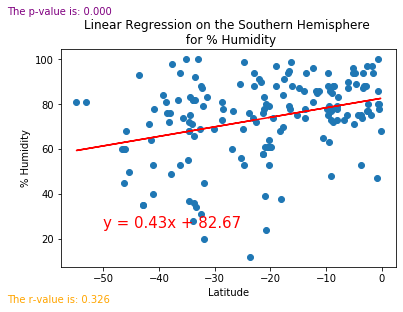

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for % Humidity")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-50,25))


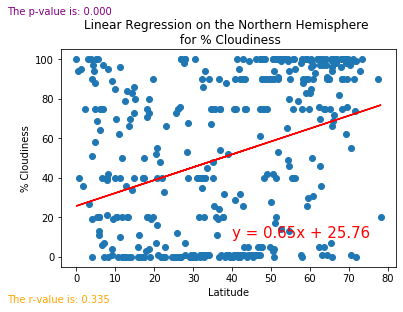

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for % Cloudiness")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(40,10))

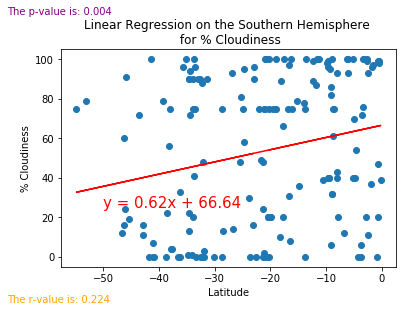

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for % Cloudiness")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-50,25))


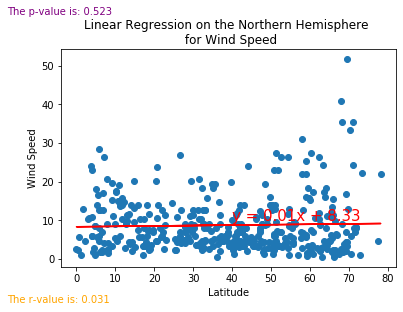

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed",(40,10))

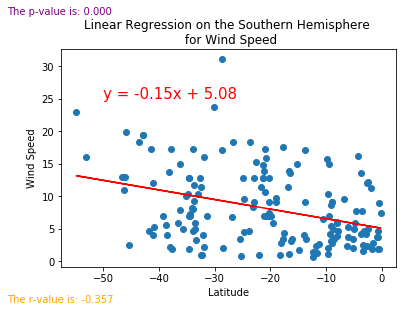

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-50,25))
